# DSA2101 Project
**Dataset: Global Holidays and Travel**
- global_holidays.csv
- monthly_passengers.csv

![image.png](https://www.travelandleisure.com/thmb/GOz6vGsxzftrzy8NHOi5gGoThfw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/TAL-singapore-changi-airport-BESTAIRPORT0425-729051db4888417eae8dff4cc874668f.jpg)

# **1. Introduction**

### The Question: "What factors affect domestic and international air travel across countries?"

Air travel is a major driver of global mobility, shaping how people move across cities, regions, and continents. Travel demand does not remain constant it rises and falls across seasons, cultural periods, and national events.

In this report, we will be using two data sets: global_holidays.csv and monthly_passengers.csv to investigate how different factors, such as holiday periods, country development status and seasonality shape domestic and international air travel volumes.

Our three guiding questions are:
1. Do different types of holidays encourage domestic vs international travel differently across development levels?
2. Does the number of holidays in a month/year influence domestic vs international travel preference?

3. How does seasonality shape travel patterns across development levels?

**Overview of the Data set**

Public holidays have important impacts on population mobility and dynamics across multiple spatial and temporal scales, subsequently affecting the transmission dynamics of infectious diseases and many socioeconomic activities. However, worldwide data on public and school holidays for understanding their changes across regions and years have not been assembled into a single, open-source and multitemporal dataset. To address this gap, an open access archive of data on public and school holidays in 2010–2019 across the globe at daily, weekly, and monthly timescales was constructed. Airline passenger volumes across 90 countries from 2010 to 2018 were also assembled to illustrate the usage of the holiday data for understanding the changing spatiotemporal patterns of population movements.

**global_holidays.csv**

| variable | class | description |
|:---|:---|:---|
| ADM_name | char | Name of administering location (country or other political subdivision). |
| ISO3 | char | 3-letter ISO code for this location. |
| Date | date | Date of the observance. |
| Name | char | Name of observance. |
| Type | char | Type of the observance. One of "Half-day Holiday", "Local holiday", "Local observance", "Observance", "Public holiday", "Special holiday", or "Working day (replacement)".|

**monthly_passengers.csv**

| variable | class | description |
|:---|:---|:---|
| ISO3 | char | 3-letter ISO code for this location. |
| Year | int | Year of the flights. |
| Month | int | Month of the flights. |
| Total | double | Total number of air passengers in thousands, obtained from official statistics. |
| Domestic | double | Number of internal air passengers in thousands for a country, obtained from official statistics. |
| International | double | Number of international air passengers in thousands, obtained from official statistics. |
| Total_OS | double | Total number of air passengers in thousands, obtained from other openly available data sources. |

**Libraries**

In [ ]:
!pip install geodatasets
import geodatasets
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from plotnine import *

# **2. Summary Statistics & Data Cleaning**


**Load CSV files**

In [ ]:
# Copy URL
global_holidays_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/global_holidays.csv'
monthly_passengers_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-24/monthly_passengers.csv'
# Read data
global_holidays = pd.read_csv(global_holidays_url)
monthly_passengers = pd.read_csv(monthly_passengers_url)

In [ ]:
# Reference data for level of development
# dataset from Github: Worldwide Human Development Index Data from 1990-2022
hdi_url = 'https://raw.githubusercontent.com/openwashdata/worldhdi/main/inst/extdata/worldhdi.csv'
hdi = pd.read_csv(hdi_url)

**Data exploration**

In [ ]:
# shape
print(global_holidays.shape)
print(monthly_passengers.shape)

(44393, 5)
(7242, 7)


In [ ]:
# Overall Summary
print(global_holidays.info())
print(monthly_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44393 entries, 0 to 44392
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ADM_name  44393 non-null  object
 1   ISO3      44393 non-null  object
 2   Date      44393 non-null  object
 3   Name      44393 non-null  object
 4   Type      44393 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO3           7242 non-null   object 
 1   Year           7242 non-null   int64  
 2   Month          7242 non-null   int64  
 3   Total          3955 non-null   float64
 4   Domestic       3292 non-null   float64
 5   International  3847 non-null   float64
 6   Total_OS       6594 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 396.2+ KB
None


In [ ]:
global_holidays.head()

,ADM_name,ISO3,Date,Name,Type
0,Aruba,ABW,2010-01-01,New Year's Day,Public holiday
1,Aruba,ABW,2010-01-25,Betico Croes' Birthday,Public holiday
2,Aruba,ABW,2010-02-15,Carnival Monday,Public holiday
3,Aruba,ABW,2010-03-18,National Anthem and Flag Day,Public holiday
4,Aruba,ABW,2010-04-02,Good Friday,Public holiday


In [ ]:
monthly_passengers.head()

,ISO3,Year,Month,Total,Domestic,International,Total_OS
0,ALB,2010,1,NaN,NaN,NaN,117.350
1,ALB,2010,2,NaN,NaN,NaN,86.535
2,ALB,2010,3,NaN,NaN,NaN,103.795
3,ALB,2010,4,NaN,NaN,NaN,102.038
4,ALB,2010,5,NaN,NaN,NaN,109.037


In [ ]:
global_holidays.describe()

,ADM_name,ISO3,Date,Name,Type
count,44393,44393,44393,44393,44393
unique,232,232,3558,2302,7
top,Us,USA,2016-05-01,Christmas Day,Public holiday
freq,1079,1079,195,1853,30669


In [ ]:
monthly_passengers.describe()

,Year,Month,Total,Domestic,International,Total_OS
count,7242.000000,7242.000000,3955.000000,3292.000000,3847.00000,6594.000000
mean,2014.010909,6.457332,6502.151691,3752.371143,3316.47599,5269.061408
std,2.427520,3.448825,12487.130185,11588.763321,4317.31194,14859.672268
min,2010.000000,1.000000,49.478000,0.001000,49.47800,12.756000
25%,2012.000000,3.000000,561.674500,6.660500,472.05700,214.734500
50%,2014.000000,6.000000,2133.740000,167.428500,1710.78300,1211.110000
75%,2016.000000,9.000000,6445.708000,1963.495750,3879.65450,4664.711000
max,2019.000000,12.000000,84373.000000,72697.000000,26498.42400,150581.215000


In [ ]:
# Check for na values
global_holidays.isna().sum()

,0
ADM_name,0
ISO3,0
Date,0
Name,0
Type,0


In [ ]:
monthly_passengers.isna().sum()

,0
ISO3,0
Year,0
Month,0
Total,3287
Domestic,3950
International,3395
Total_OS,648


In [ ]:
# exploring data for 2019 in monthly_passengers.csv
passengers_2019 = monthly_passengers[monthly_passengers['Year'] == 2019].copy()
display(passengers_2019)
passengers_2019.shape[0]

,ISO3,Year,Month,Total,Domestic,International,Total_OS
1342,CHN,2019,1,53409.0,46338.0,6075.0,NaN
1343,CHN,2019,2,53827.0,46839.0,5973.0,NaN
1344,CHN,2019,3,53504.0,46435.0,6046.0,NaN
1345,CHN,2019,4,53118.0,45990.0,6080.0,NaN
1346,CHN,2019,5,54509.0,47417.0,6031.0,NaN
1347,CHN,2019,6,53414.0,46298.0,6081.0,NaN
1348,CHN,2019,7,59304.0,51612.0,6590.0,NaN
1349,CHN,2019,8,NaN,NaN,NaN,NaN
1350,CHN,2019,9,NaN,NaN,NaN,NaN
1351,CHN,2019,10,NaN,NaN,NaN,NaN


12

Since there are only 12 rows of data for China in 2019, suggesting that the data for 2019 is largely incomplete, we decided to focus our analysis of both datasets from 2010 to 2018.

**Data Cleaning (For all three plots)**

In [ ]:
# Convert Date column in global holidays into separate Month and Year columns (for merging with monthly_passengers)
global_holidays['Date'] = pd.to_datetime(global_holidays['Date'])
global_holidays['Month'] = global_holidays['Date'].dt.month
global_holidays['Year'] = global_holidays['Date'].dt.year

In [ ]:
# drop 2019 values for both datasets (only considering analysis for 2010 to 2018)
global_holidays = global_holidays[global_holidays['Year'] != 2019]
monthly_passengers = monthly_passengers[monthly_passengers['Year'] != 2019]

In [ ]:
# fill NaN in Total_OS with Total to prevent loss of information (for plot 3)
monthly_passengers['Total_Final'] = monthly_passengers['Total_OS'].fillna(monthly_passengers['Total'])

In [ ]:
# HDI (External dataset):
# drop non-country rows
hdi = hdi.dropna(subset=['iso3c'])
# Rename iso3c to ISO3 (for consistency)
hdi = hdi.rename(columns={'iso3c': 'ISO3'})
# only keep 2015 column (rmb justification)
hdi = hdi[['ISO3', 'hdi_2015']]
hdi = hdi.rename(columns={'hdi_2015': 'hdi'})

We have decided to define our developed and developing categories based on HDI data from 2015 as it is the midpoint between the available HDI data from 2010-2019. Additionally, it reflects the most recent modern development level of all countries while aligning with the range of years that have sufficiently available data from the 2 main datasets. As 2019 has incomplete data, we have chosen to use 2015 as a better reference.

**Base Dataframe for Questions 1 and 2**

In [ ]:
# Drop NaN and Melt monthly_passengers dataset from wide to long
clean_passengers = monthly_passengers.dropna(subset=["International"]).copy()
clean_passengers["Domestic"] = clean_passengers["Domestic"].fillna(0)

clean_passengers = clean_passengers.melt(
    id_vars = ["ISO3", "Year", "Month"],
    value_vars = ["Domestic", "International"],
    var_name = "Travel_type",
    value_name = "Passengers"
)

In [ ]:
# Count the number of holidays (i.e, no. of rows) in each group,
# corresponding to a unique combination of country, month, year and holiday type
holidays_by_type = (global_holidays.groupby(["ISO3", "Month", "Year", "Type"], as_index=False).
                 size().rename(columns={"size": "Num_holidays", "Type": "Holiday_type"}))

In [ ]:
# Merge monthly_passengers and holidays_by_type datasets
# by ISO3, Year and Month for sub-questions 1 and 2
df = pd.merge(
    clean_passengers,
    holidays_by_type,
    on=["ISO3", "Year", "Month"],
    how='left')

HDI has 4 tiers: low (<0.55), medium (0.55-0.699), high (0.7-0.799) and very high (>0.8). In defining 'developed countries', a common threshold of 0.8 was used. According to World Population Review (2025), countries with a HDI score including and above this threshold are considered developed since it aligns with global standards set by United Nations Development Programme. Hence, to maintain consistency, countries with HDI values of less than 0.8 will be considered developing while those with values greater than or equal to 0.8 will be considered developed.

In [ ]:
# Merge df and the HDI dataset to form the base dataset for Q1 and Q2
df = df.merge(hdi, on='ISO3', how='left')

# Development level using 0.8 threshold
df['Development_level'] = np.where(df['hdi'] >= 0.8, 'Developed', 'Developing')
df = df.drop(columns=['hdi'])
df.head()

,ISO3,Year,Month,Travel_type,Passengers,Holiday_type,Num_holidays,Development_level
0,AUS,2010,1,Domestic,4085.0,Public holiday,2.0,Developed
1,AUS,2010,2,Domestic,3911.0,Observance,2.0,Developed
2,AUS,2010,3,Domestic,4408.0,Observance,2.0,Developed
3,AUS,2010,3,Domestic,4408.0,Public holiday,1.0,Developed
4,AUS,2010,4,Domestic,4352.0,Local holiday,1.0,Developed


**Base dataframe for question 3**

In [ ]:
df3 = monthly_passengers.copy()

def month_to_season(m):
    if m in (3, 4, 5):
        return "Mar, Apr, May"
    if m in (6, 7, 8):
        return "Jun, Jul, Aug"
    if m in (9, 10, 11):
        return "Sep, Oct, Nov"
    if m in (12, 1, 2):
        return "Dec, Jan, Feb"
    return pd.NA

# apply to df
df3['Season'] = df3['Month'].apply(month_to_season)

#### Summary statistics

**Global average monthly passenger volume**

In [ ]:
# 1. Global average monthly passenger volume
avg_passengers = (monthly_passengers[['Domestic', 'International']]
                  .mean().reset_index(name='Passengers (millions)')
                  .rename(columns={'index': 'Travel Type'}))
avg_passengers['Passengers (millions)'] = (avg_passengers['Passengers (millions)']/1000).round(2)
avg_passengers

,Travel Type,Passengers (millions)
0,Domestic,3.66
1,International,3.31


The average monthly passenger volume per country of domestic flights (3.66 million) is higher than that of international flights (3.31 million). This indicates stronger local mobiity but substantial cross-border travel.

**Most common holiday types**

In [ ]:
# Most common holiday types
holiday_type_prop = (global_holidays['Type'].value_counts(normalize=True)
                       .mul(100).round(1).reset_index(name='Percentage'))
holiday_type_prop

,Type,Percentage
0,Public holiday,69.1
1,Observance,23.7
2,Local holiday,5.2
3,Local observance,0.8
4,Special holiday,0.6
5,Working day (replacement),0.4
6,Half-day holiday,0.3


Public holidays make up the largest share of global observances (69.1%), followed by observances (23.6%) and local holidays (5.2%). This reflects the institutional and cultural drivers of travel. Public holidays are an officially recognised national holiday recognised by the government, while observances are days recognised for cultural, religious or historical reasons. Local holidays are public holidays applied to a specific city, province or region.

**Average holidays per month per country**

In [ ]:
holidays_per_month = (df.groupby(['ISO3', 'Year', 'Month'])['Num_holidays']
                .sum().reset_index())
avg_holidays = (holidays_per_month.groupby('Month')['Num_holidays']
                .mean().round(2).reset_index())
display(avg_holidays)
print(avg_holidays['Num_holidays'].mean().round(2))

,Month,Num_holidays
0,1,3.62
1,2,3.21
2,3,3.54
3,4,6.61
4,5,7.82
5,6,4.59
6,7,1.48
7,8,2.40
8,9,2.82
9,10,3.26


4.27


Each country has roughly 4–5 holidays per month on average, with clear peaks in December and mid-year, aligning with major global holiday seasons.

**Top countries dominating air travel per year on average**

In [ ]:
# Matching ISO3 to country names
country_code = pd.DataFrame({'Country': list(global_holidays['ADM_name'].unique()),
                             'ISO3': list(global_holidays['ISO3'].unique())})
# Aggregating sum by ISO3 and year, followed by taking mean of years
country_per_year = (monthly_passengers.groupby(['ISO3', 'Year'])[['Total_Final']]
                    .sum().reset_index())
top_countries = (country_per_year.groupby('ISO3')['Total_Final']
                 .mean().sort_values(ascending=False).reset_index(name='Passengers'))
top_countries['Passengers (in millions)'] = (top_countries['Passengers']/1000).round(1)
top_countries = (pd.merge(country_code, top_countries, on='ISO3', how='right')
                 .drop(columns=['ISO3', 'Passengers']))
top_countries.head(10)

,Country,Passengers (in millions)
0,Us,1368.6
1,China,261.8
2,Uk,246.2
3,India,235.3
4,Germany,212.1
5,Spain,208.9
6,Brazil,178.2
7,France,154.2
8,Italy,152.9
9,Turkey,147.0


To understand the distribution of global air travel, we computed the average annual passenger volume per country between 2010 and 2018. The United States account for over 1.3 billion passengers per year on average, followed by China (262 million), the United Kingdom (246 million) and India (235 million).

**Average annual share of global air passenger volume by leading countries**

In [ ]:
country_year_ave = (country_per_year.groupby('ISO3')['Total_Final']
                    .mean().sort_values(ascending=False).reset_index())
total_global = (monthly_passengers.groupby('Year')['Total_Final'].sum().mean())
share_top10 = country_year_ave[0:10]['Total_Final'].sum() / total_global * 100
print(f'{share_top10.round(1)}%')

70.9%


The top 10 countries account for 70.9% of total passenger volume averaged across 2010 to 2018. This concentration implies that aggregate passenger statistics are heavily influenced by a few high-traffic countries, potentially masking travel behaviours in smaller or less developed regions. Hence, rather than raw passenger volume data, we ranked the volumes within each country while aggregating for a fairer comparison of the relative change of travel behaviour in each country.

# **3. Visualisations and Interpretation of Results**

# Guiding Question 1: Do different types of holidays encourage domestic and international travel differently across development levels?

For this comparison, we chose to do a heatmap because it is an effective way to visualize the relationship between holiday type and travel type. It helps display two categorical variables in a clear and structured format. The use of color intensity allows for quick identification of patterns and differences in the proportion of domestic and international flights. By placing the heatmaps for developed and developing countries side by side with a shared color scale, it becomes easy to compare their travel trends visually. Overall, the heatmap presents complex numerical information in an intuitive and visually engaging way, making key insights immediately noticeable.


In [ ]:
# Sum passenger totals for each unique combination of the 3
q1_prop = (
    df.groupby(['Development_level', 'Holiday_type', 'Travel_type'],
               as_index=False)['Passengers'].sum()).copy()

# Calculate proportions within each dev_level x holiday_type
q1_prop['Proportion'] = (q1_prop.groupby(['Development_level', 'Holiday_type'])['Passengers']
                         .transform(lambda x: x / x.sum()))
display(q1_prop.head(10))

,Development_level,Holiday_type,Travel_type,Passengers,Proportion
0,Developed,Half-day holiday,Domestic,194.077,0.021754
1,Developed,Half-day holiday,International,8727.294,0.978246
2,Developed,Local holiday,Domestic,723824.896,0.162179
3,Developed,Local holiday,International,3739305.318,0.837821
4,Developed,Local observance,Domestic,5336514.896,0.818939
5,Developed,Local observance,International,1179861.731,0.181061
6,Developed,Observance,Domestic,7292733.529,0.562257
7,Developed,Observance,International,5677717.849,0.437743
8,Developed,Public holiday,Domestic,4992732.233,0.465667
9,Developed,Public holiday,International,5728937.641,0.534333


Using the previously prepared data set df, we performed a .groupby() operation using the columns ["Development_level", "Holiday_type", "Travel_type"] to aggregate passenger counts across combinations of development levels, holiday types, and travel types. We then applied the .sum() method on the Passengers column to compute the total number of passengers for each unique combination. The resulting DataFrame was stored as q1_prop.

Next, to calculate the relative share of each travel type within each development level and holiday type, we used the .groupby() method again, on ["Development_level", "Holiday_type"], and applied the .transform() function to divide each Passengers value by the sum of all Passengers within its respective group. This produced a new column, Proportion, which represents the proportion of each travel type relative to the total passenger count for that specific development level and holiday type. The formula is:

**Proportion (t,h) = (Number of flights of type t) / (Domestic + International flights for holiday type h)**, where t=travel type and h=holiday of any type

In [ ]:
q1_prop = q1_prop[~q1_prop['Holiday_type'].isin(['Half-day holiday', 'Local observance'])]

Two holiday types, “Half-day holiday” and “Local observance”, were excluded from the final analysis for comparison because they were only present in developed countries and had no corresponding representation in developing countries. Including these categories would have introduced asymmetry in the comparison between developed and developing nations. Since the research objective was to compare patterns of domestic versus international air travel across equivalent holiday types between the two development groups, retaining variables that exist in only one group would bias the results. Furthermore, both “Half-day holidays” and “Local observances” typically refer to minor holidays that often have limited national-level travel impact.


The resulting proportions were visualised using a stacked heatmap, with a two-panel figure with a shared y-axis to compare results side-by-side across development levels plotted using sns.heatmap(). The colour bar at the right side of the plot displays the relationship between the colour intensity and the proportion of domestic and international air travel. This allows for a quick comparison of travel patterns across both development levels and holiday categories, highlighting how developmental levels influences travel behaviour during holidays.


/tmp/ipython-input-4036664761.py:98: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



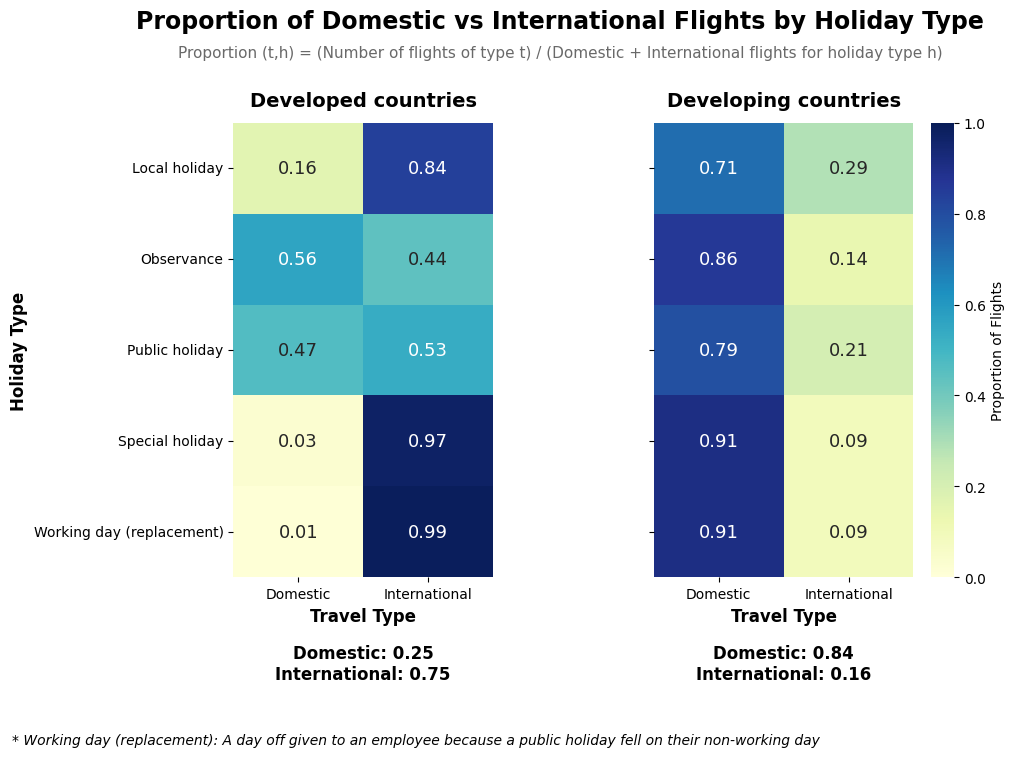

In [ ]:
dev_levels = ["Developed", "Developing"]

fig, axes = plt.subplots(
    1, 2,
    figsize=(10, 6),
    sharey=True,
    constrained_layout=True
)

vmin, vmax = 0, 1
cmap = "YlGnBu"

# =============================================================
# 1. Compute overall domestic / international proportions
# =============================================================
overall = (
    q1_prop
    .groupby(["Development_level", "Travel_type"])["Proportion"]
    .mean()
    .unstack()
)

overall["Prop_domestic"] = overall["Domestic"]
overall["Prop_international"] = overall["International"]

# Create label text for under-column summaries
summary_labels = {
    dev: (
        f"Domestic: {overall.loc[dev, 'Prop_domestic']:.2f}\n"
        f"International: {overall.loc[dev, 'Prop_international']:.2f}"
    )
    for dev in dev_levels
}

# =============================================================
# 2. Draw heatmaps
# =============================================================
for i, dev in enumerate(dev_levels):

    # Pivot into heatmap format
    pivot = q1_prop[q1_prop['Development_level'] == dev].pivot(
        index='Holiday_type',
        columns='Travel_type',
        values='Proportion'
    )

    sns.heatmap(
        pivot,
        annot=True,
        cmap=cmap,
        fmt=".2f",
        ax=axes[i],
        vmin=vmin, vmax=vmax,
        cbar=(i == 1),
        cbar_kws={'label': 'Proportion of Flights'} if i == 1 else None,
        annot_kws={"size": 13},
        square=False
    )

    axes[i].set_title(f"{dev} countries", fontsize=14, weight='bold', pad=12)
    axes[i].set_xlabel("Travel Type", fontsize=12, fontweight="heavy")

    if i == 0:
        axes[i].set_ylabel("Holiday Type", fontsize=12, fontweight="heavy")
    else:
        axes[i].set_ylabel("")

    axes[i].set_aspect(0.7)

    # =============================================================
    # 3. Add domestic/international proportion labels below each plot
    # =============================================================
    axes[i].text(
        0.5, -0.19,                      # position below heatmap
        summary_labels[dev],
        ha="center", va="center",
        transform=axes[i].transAxes,
        fontsize=12,
        weight="bold",
        color="black"
    )

# =============================================================
# Figure Titles and Notes
# =============================================================

plt.suptitle(
    "Proportion of Domestic vs International Flights by Holiday Type",
    fontsize=17, weight='bold', y=1.13, x=0.55, horizontalalignment="center"
)

plt.figtext(
    0.55, 1.05,
    "Proportion (t,h) = (Number of flights of type t) / (Domestic + International flights for holiday type h)",
    ha="center", fontsize=11, color="dimgray"
)

plt.subplots_adjust(left=0.12, right=0.98, wspace=0.30, top=0.88)

plt.figtext(
    0.002, -0.1,
    "* Working day (replacement): A day off given to an employee because a public holiday fell on their non-working day",
    ha="left", va="bottom", fontsize=10, style="italic"
)

plt.show()


The visualization reveals a stark contrast between the travel patterns of developed and developing countries during holidays.

In developed countries, international flights overwhelmingly dominate across all holiday types, accounting for 0.75 of all travel.

In developed countries, during Local holidays, 0.84 of total travel is international travel, indicating that residents of wealthier nations often use short public breaks to travel abroad. Public holidays and Observances are the exception, with 0.56 of travel being domestic during Observances and 0.47 of travel being domestic during Public Holidays. This suggests that during major national or cultural holidays, people in developed nations tend to avoid travelling internationally, likely engaging in family visits or domestic tourism.

In contrast, developing countries display the opposite trend, with the vast majority of travel, around 0.84, being domestic across all holiday types.

Only a small fraction represents international flights. This pattern reflects the lower disposable incomes present in developing countries. It also highlights the strong cultural and social role of domestic travel during holidays, as people prioritize family gatherings and local tourism over international trips.


# Guiding Question 2: Does the number of holidays in a month / year influence domestic vs international travel preference?

To address this question, we have chosen to use a line plot because number of holidays is a continuous variable and our goal is to observe how average number of passengers changes as this value increases. Line plots effectively reveal trends and non-linear patterns, allowing a clear comparison of domestic and international travel on the same scale. This makes them ideal for illustrating whether holiday frequency influences different travel types.  

Using the previously prepared data set, df, we perform .groupby using [“ISO3”, “Year”, “Month”] to compute the total number of holidays per month for each county. We then applied the .sum() method on the Num_holidays column to calculate the total number of holidays of all types in each month. We stored this dataframe in holidays_total.



In [ ]:
holidays_total = (df.groupby(["ISO3", "Year", "Month"], as_index=False)["Num_holidays"]
       .sum())

For computation and plotting, we perform a left merge with the clean_passengers and holidays_total dataset on [“ISO3”, “Year”, “Month”] to obtain df2, ensuring that all passenger records are retained even if some months have no recorded holidays.

In [ ]:
df2 = (clean_passengers.merge(holidays_total, on=["ISO3", "Year", "Month"], how='left'))
display(df2.head(10))

,ISO3,Year,Month,Travel_type,Passengers,Num_holidays
0,AUS,2010,1,Domestic,4085.0,4.0
1,AUS,2010,2,Domestic,3911.0,4.0
2,AUS,2010,3,Domestic,4408.0,6.0
3,AUS,2010,4,Domestic,4352.0,10.0
4,AUS,2010,5,Domestic,4153.0,4.0
5,AUS,2010,6,Domestic,4158.0,4.0
6,AUS,2010,7,Domestic,4633.0,2.0
7,AUS,2010,8,Domestic,4519.0,0.0
8,AUS,2010,9,Domestic,4613.0,2.0
9,AUS,2010,10,Domestic,4832.0,2.0


To plot the line graph, we then computed the average number of passengers for each combination of travel type and number of holidays. Specifically, we used .groupby(["Travel_type", "Num_holidays"]), followed by taking the mean of ["Passengers"].

Thus, the resulting holiday_mean dataframe summarises, over all countries and years, the average number of passengers associated with each travel type for holidays with a given number of holidays. The formula is:

**Average passengers (t,n): (Total passengers for travel type t in each month with n holidays) / (Number of such months)**,
where t=travel type and n=number of holidays in the month

Finally, using plotly.express, we created an interactive line plot to clearly visualize the correlation between the number of holidays in a month and the two different travel types, with each travel type represented by a distinct colored line. The interactive feature also allows users to view detailed information about each data point on the plot.

In [ ]:
# Create interactive lineplot of average passengers vs number of holidays in a month
holiday_mean = df2.groupby(["Travel_type", "Num_holidays"])["Passengers"].mean().reset_index()

fig = px.line(
    holiday_mean,
    x="Num_holidays",
    y="Passengers",
    color="Travel_type",
    markers=True,
    labels={
        "Num_holidays": "Number of Holidays in a Month",
        "Passengers": "Average Number of Passengers"}
)

fig.update_layout(legend_title_text="Travel Type",
                  title_x=0.5)

fig.update_layout(title=dict(text="<b>Average Number of Passengers vs Number of Holidays in a Month<b>",
                             subtitle=dict(text="Average passengers (t,n): (Total passengers for travel type t in all months with n holidays) / (Number of such months)",
                                           font=dict(size=13, color="gray")
                  )))

fig.show()

This visualization illustrates how the average number of passengers varies with the number of holidays in a month (with averages taken across nine years of monthly data) and distinguishing between domestic and international travel. The primary insight displayed is that domestic travel increases sharply as the number of holidays rises, while international travel remains relatively stable regardless of how many holidays there are.

This suggests that people are more likely to take domestic trips when they have more days off, but their international travel patterns are less affected by short-term increases in holidays. This pattern can be explained by several factors. Domestic trips are generally shorter, more affordable, and easier to organize, making them ideal for taking advantage of a few extra holidays in a month.

In contrast, international travel typically requires more planning, higher costs, and longer durations, so a small increase in the number of holidays may not significantly influence people’s decisions to travel abroad. Additionally, many holidays in the data set coincide with cultural or country-specific events, during which people may prefer to travel locally rather than internationally.

Overall, the data highlights that the number of holidays is a significant factor influencing domestic travel demand, but it has little impact on international travel. This finding supports our overarching question of what factors influence travel behavior by showing that the number of holidays is a key factor of domestic travel but not necessarily of international travels.

# Guiding Question 3: How does seasonality shape travel patterns across countries?

For this question, we decided to use a choropleth map to visualise the relationship. This method is ideal because it clearly shows how travel intensity varies across countries and seasons. It helps highlight regional and hemispheric patterns and allow seasonal comparisons to be made geographically.


In [ ]:

# import the shapefile
url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"

world = gpd.read_file(url)
world = world.rename(columns = {'SOV_A3': 'ISO3'})
world.head()

# Create a dictionary mapping the incorrect code to the correct code
replacement_dict = {'AU1': 'AUS', 'US1': 'USA', 'CH1': 'CHN',
                    'IS1': 'ISR', 'NL1': 'NLD', 'NZ1': 'NZL',
                    'FI1': 'FIN', 'GB1': 'GBR', 'DN1': 'DNK',
                    'FR1': 'FRA', 'CU1': 'CUB', 'GR1': 'GRC',
                    'HKG': 'CHN', 'MAC': 'CHN', 'GUY': 'GUF',
                    'SHN': 'GBR', 'SDS': 'SSD', 'KOS': 'XKX'}

# Apply the replacement dictionary directly to the 'ISO3' column
world['ISO3'] = world['ISO3'].replace(replacement_dict)
world = world[world['SOVEREIGNT'] != 'Antarctica']

world_projected = world.to_crs('EPSG:4326')

world_projected.head(2)

#world['ISO3'].unique()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,ISO3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


Using the Natural Earth shapefile, we imported a global country boundary dataset via GeoPandas to create the geographic base for the choropleth map. We then renamed the column SOV_A3 to ISO3 to align country codes with those in the main air passenger dataset. To ensure accurate merging between datasets, a replacement dictionary was applied to correct inconsistent or special region codes (like 'AU1' → 'AUS', 'US1' → 'USA', 'HKG' → 'CHN'). Antarctica was excluded to focus the visualization on inhabited regions.

The shapefile was finally reprojected into the WGS 84 coordinate reference system (EPSG:4326) for consistent geographic representation.


In [ ]:
# Data preparation
# calculate Seasonal Average (seasonal_avg_travel) using 'df'
seasonal_avg_travel = df3.groupby(['ISO3', 'Season'])['Total_Final'].mean().reset_index()

# calculate Seasonal Rank (1 = slowest season, 4 = busiest season)
seasonal_avg_travel['season_rank'] = (seasonal_avg_travel
                                      .groupby('ISO3')['Total_Final']
                                      .rank(method = 'min', ascending = True, na_option = 'keep'))

# filter out rows where the rank is NaN
seasonal_avg_travel_clean = seasonal_avg_travel.dropna(subset = ['season_rank']).copy()

Using the prepared dataset df3, we first grouped the data by ["ISO3", "Season"] and applied the .mean() function on the Total_Final column to calculate the average number of passengers per season for each country. The resulting DataFrame was stored as seasonal_avg_travel.

Next, to measure each country’s relative travel activity across its four seasons, we used the .rank() function within each country (groupby('ISO3')). The ranking was based on the seasonal averages, where Rank 1 represents the slowest travel season and Rank 4 represents the busiest. This standardizes comparisons within each country, removing bias from country size or total travel volume.

Finally, we removed any rows with missing rank values (NaN) to ensure the dataset only included countries with complete seasonal data. The cleaned version was stored as seasonal_avg_travel_clean for mapping.

Using the prepared basemap world_projected and the seasonal dataset seasonal_avg_travel_clean, we created a 2×2 subplot layout to visualise global air travel by season based on the standard Northern Hemisphere calendar (Dec - Feb, Mar - May, Jun - Aug, Sep - Nov). For each season, the data was filtered and merged with the world shapefile on ‘ISO3’, ensuring every country was represented even if data was missing.

Each subplot displays a choropleth map shaded by ‘season_rank’ (1 - 4) using a green color scale, where light green indicates the least busy (rank 1) and dark green the most active travel period (rank 4). Titles and annotations highlight the key patterns and a shared horizontal colorbar and explanatory legend were added to guide interpretation.


/tmp/ipython-input-2124964233.py:141: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



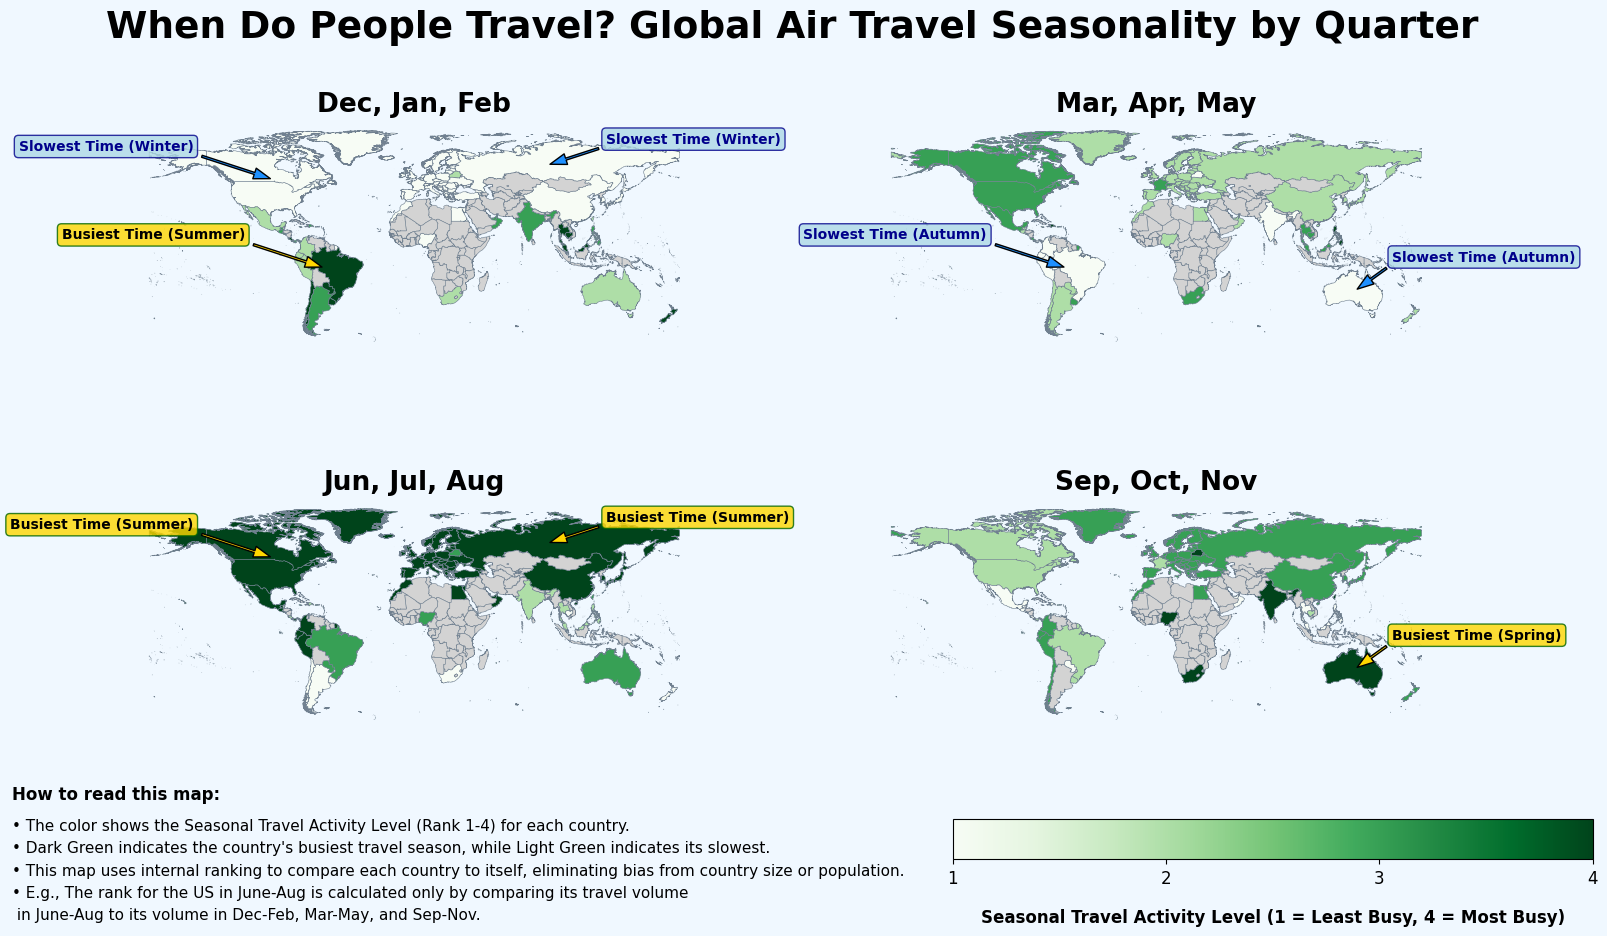

In [ ]:
# initialise figure: 2 rows and 2 columns
fig, axes = plt.subplots(2, 2,
                         figsize = (16, 10),
                         facecolor = '#F0F8FF')
axes = axes.flatten()

# new vmin/vmax for ranks 1 through 4
vmin = 1
vmax = 4

# Define the seasons in the desired plotting order
season_order = ['Dec, Jan, Feb', 'Mar, Apr, May',
                'Jun, Jul, Aug', 'Sep, Oct, Nov']


for i, season in enumerate(season_order):
    ax = axes[i]

    # filter the cleaned data for the current season
    season_data_subset = seasonal_avg_travel_clean[seasonal_avg_travel_clean['Season'] == season]

    # merge onto the full base map (world_projected)
    season_map_data = world_projected.merge(season_data_subset,
                                            on = 'ISO3',
                                            how = 'left')

    # plot the seasonal rank
    season_map_data.plot(column = 'season_rank',
                         cmap = 'Greens',
                         linewidth = 0.4,
                         ax = ax,
                         edgecolor = 'slategray',
                         missing_kwds = {"color": "lightgrey", "label": "No data"},
                         vmin = vmin,
                         vmax = vmax)

    # set title to the season name
    ax.set_title(season, fontsize = 19, fontweight = 'heavy')

    ax.set_aspect('equal')
    ax.set_frame_on(False)
    ax.axis('off')

    # Map 1: Dec, Jan, Feb
    if "Dec, Jan, Feb" in season:
        # US & CANADA
        ax.annotate('Slowest Time (Winter)', xy = (-95, 50), xytext = (-150, 70),
                    arrowprops = dict(facecolor = 'dodgerblue', shrink = 0.05, width = 1.5, headwidth = 8),
                    bbox = dict(boxstyle = 'round, pad = 0.3', fc = 'lightblue', ec = 'darkblue', alpha = 0.8),
                    fontsize = 10, fontweight = 'bold', color = 'darkblue', horizontalalignment='right')

        # SOUTH AMERICA
        ax.annotate('Busiest Time (Summer)', xy = (-60, -10), xytext = (-115, 10),
                    arrowprops=dict(facecolor='gold', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='gold', ec='darkgreen', alpha=0.8),
                    fontsize=10, fontweight='bold', color='black', horizontalalignment='right')

        # RUSSIA & CHINA
        ax.annotate('Slowest Time (Winter)', xy = (90, 60), xytext = (130, 75),
                    arrowprops=dict(facecolor='dodgerblue', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='lightblue', ec='darkblue', alpha=0.8),
                    fontsize=10, fontweight='bold', color='darkblue', horizontalalignment='left')

    # Map 2: Mar, Apr, May
    elif "Mar, Apr, May" in season:
        # Southern Hemisphere
        ax.annotate('Slowest Time (Autumn)', xy = (135, -25), xytext = (160, -5),
                    arrowprops=dict(facecolor='dodgerblue', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='lightblue', ec='darkblue', alpha=0.8),
                    fontsize=10, fontweight='bold', color='darkblue', horizontalalignment='left')

        # Southern Hemisphere
        ax.annotate('Slowest Time (Autumn)', xy = (-60, -10), xytext = (-115, 10),
                    arrowprops=dict(facecolor='dodgerblue', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='lightblue', ec='darkblue', alpha=0.8),
                    fontsize=10, fontweight='bold', color='darkblue', horizontalalignment='right')

    # Map 3: Jun, Jul, Aug
    elif "Jun, Jul, Aug" in season:
        # US & CANADA
        ax.annotate('Busiest Time (Summer)', xy = (-95, 50), xytext = (-150, 70),
                    arrowprops=dict(facecolor='gold', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='gold', ec='darkgreen', alpha=0.8),
                    fontsize=10, fontweight='bold', color='black', horizontalalignment='right')

        # CHINA/RUSSIA
        ax.annotate('Busiest Time (Summer)', xy = (90, 60), xytext = (130, 75),
                    arrowprops=dict(facecolor='gold', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='gold', ec='darkgreen', alpha=0.8),
                    fontsize=10, fontweight='bold', color='black', horizontalalignment='left')

    # Map 4: Sep, Oct, Nov
    elif "Sep, Oct, Nov" in season:
        # Southern Hemisphere
        ax.annotate('Busiest Time (Spring)', xy = (135, -25), xytext = (160, -5),
                    arrowprops=dict(facecolor='gold', shrink=0.05, width=1.5, headwidth=8),
                    bbox=dict(boxstyle='round, pad=0.3', fc='gold', ec='darkgreen', alpha=0.8),
                    fontsize=10, fontweight='bold', color='black', horizontalalignment='left')


fig.suptitle('When Do People Travel? Global Air Travel Seasonality by Quarter',
             fontsize = 27,
             y = 1,
             fontweight = 'heavy', horizontalalignment = 'center')

sm = plt.cm.ScalarMappable(cmap = 'Greens', norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm.set_array([])

cbar = fig.colorbar(sm, cax = fig.add_axes([0.60, 0.15, 0.40, 0.04]) , orientation = 'horizontal',
                    fraction = 0.04, pad = 0.10, shrink = 0.9,
                    ticks = [1.0, 2.0, 3.0, 4.0])

cbar.ax.tick_params(labelsize = 'large')

cbar.set_label('Seasonal Travel Activity Level (1 = Least Busy, 4 = Most Busy)',
               fontsize = 12,
               fontweight = 'bold',
               labelpad = 15)


fig.text(
    0.012, 0.21,
    'How to read this map:',
    ha = 'left',
    fontsize = 12,
    fontweight = 'bold'
)


fig.text(
    0.012, 0.09,
    '• The color shows the Seasonal Travel Activity Level (Rank 1-4) for each country.\n'
    '• Dark Green indicates the country\'s busiest travel season, while Light Green indicates its slowest.\n'
    '• This map uses internal ranking to compare each country to itself, eliminating bias from country size or population.\n'
    '• E.g., The rank for the US in June-Aug is calculated only by comparing its travel volume\n in June-Aug to its volume in Dec-Feb, Mar-May, and Sep-Nov.',
    ha = 'left',
    fontsize = 11,
    linespacing = 1.6
)

plt.tight_layout(rect = [0, 0.15, 1, 1.07])
plt.show()

The main insight gathered is the existence of clear seasonal patterns in air travel volume, directly corresponding to major holiday periods, confirming a strong seasonal influence on travel demand.

This series of seasonal world maps illustrates how travel intensity fluctuates throughout the year. Overall, the data reveals that global travel peaks during the summer months, particularly between June and August, when the Northern Hemisphere experiences warmer weather and long holidays. During this period, regions across the Northern Hemisphere, including North America, Europe, Russia and East Asia, are shown in darker shades, indicating the highest levels of travel in those regions. This aligns with the fact that summer coincides with school vacations and favorable weather for both domestic and international travel.

In stark contrast, during the Northern Hemisphere’s winter months (December to February), travel activity concentrates in the Southern Hemisphere. Countries such as Australia, South Africa, Chile, Argentina, and Brazil display higher travel intensity, corresponding to their local summer. This clearly demonstrates that while the Northern Hemisphere experiences colder weather and reduced mobility, the Southern Hemisphere enjoys its own high tourism season during its summer months.

The March to May panel shows a moderate rise in travel as the Northern Hemisphere transitions from winter, with increasing tourism and leisure travel that is still below the summer peak. Similarly, September to November reflects a decline from the high summer activity, but activity remains steady and reveals the seasonal peak for specific regions like India and Australia (Spring Break).



# **4. Concluding Remarks**

Across the 3 visualisations, a consistent picture emerges: holiday type, holiday frequency and seasonality all play meaningful but different roles in shaping air travel volumes and these effects vary substantially between developed and developing countries.


From plot 1, developed countries show a clear preference for international travel, reflecting higher income levels and global mobility, while developing nations are more domestically focused, possibly due to reasons like affordability and local culture. In our second plot, we can clearly see that the number of holidays in a month primarily drives domestic travel but does not significantly affect international travel. This suggests that short, localised breaks encourage domestic trips but have little effect on international travel plans. Finally, our third plot demonstrates a strong correlation between seasonal patterns and travel patterns.


Combining the findings from all 3 visualisations, we can infer that holiday characteristics (type and frequency) strongly influence travel, but differently for domestic and international trips. Domestic travel responds strongly to (i) holiday frequency (more holidays → more domestic flights) and (ii) holiday type (broader or culturally significant holidays tend to boost domestic travel). International travel responds weakly overall. Only certain holiday types significantly increase international flights and it is less affected by a greater number of holidays, which could be due to structural barriers limiting spontaneity.


We can also conclude that development level shapes travel flexibility and accessibility. In developed countries, people tend to travel internationally more often during shorter holidays and depending on the holiday type, there is a wider mix of domestic and international responses. Overall, a higher disposable income and competitive flight market make international travel more accessible. On the other hand, developing countries experience an overwhelming demand for domestic travel, regardless of holiday type or frequency. This could potentially be due to costs and visa barriers, which limit international responsiveness.  


Lastly, seasonality is a strong and consistent driver of overall travel demand across countries. Peak travel seasons align with summer months, regardless of hemisphere. This shows that climate, school holidays and tourism industry cycles are also major factors influencing travel tendencies.


In conclusion, these three visualisations effectively support our overarching question as to “What factors affect domestic and international air travel?”, showing that travel behaviour is shaped by a combination of holiday characteristics, development level and global seasonal timing.

# **5. Teamwork**
Data cleaning & Summary Statistics: Glorie

Visualisation 1 (Heatmap): Grace

Visualisation 2 (Line plot): Edna

Visualisation 3 (Choropleth map): Liyi

Analysis and Interpretation of results: Anika and Liu Chen

# **6. References**
**Article:**

Lai, S., Sorichetta, A., Steele, J. et al. Global holiday datasets for understanding seasonal human mobility and population dynamics. Sci Data 9, 17 (2022). https://doi.org/10.1038/s41597-022-01120-z


**Datasets:**

Lai S., Sorichetta A. and WorldPop (2020). Global Public and School Holidays 2010-2019. Mapping seasonal denominator dynamics in low- and middle-income settings, and Exploring the seasonality of COVID-19, funded by The Bill and Melinda Gates Foundation.

Lai S., Sorichetta A. and WorldPop (2020). Monthly volume of airline passengers in 90 countries 2010-2018. Mapping seasonal denominator dynamics in low- and middle-income settings, and Exploring the seasonality of COVID-19, funded by The Bill and Melinda Gates Foundation.

**Other sources**

World Population Review. (n.d.). Developed countries. World Population Review. Retrieved November 13, 2025, from https://worldpopulationreview.com/country-rankings/developed-countries